In [1]:
import grib2io
import numpy as np
import pyproj
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 

ERROR 1: PROJ: proj_create_from_database: Open of /home/tim/anaconda3/envs/default311/share/proj failed


In [2]:
msgs = grib2io.open("../tests/data/gfs.jpeg.grib2")

In [3]:
msgs[0].latitudeFirstGridpoint

90.0

In [4]:
proj_pars = msgs[0].projParameters

In [5]:
gfs_proj = ccrs.PlateCarree(globe=ccrs.Globe(semimajor_axis=proj_pars["a"], semiminor_axis=proj_pars["b"]))

In [6]:
lats, lons = msgs[0].latlons()
lats.shape

(721, 1440)

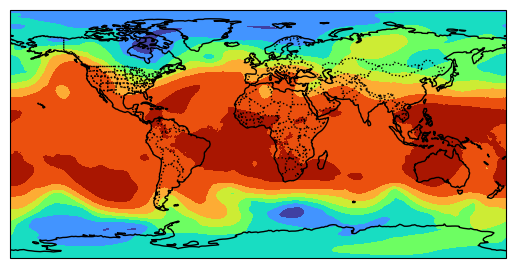

In [7]:
ax = plt.axes(projection=gfs_proj)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')
plt.contourf(lons, lats, msgs[0].data, cmap='turbo')

In [8]:
subset = msgs[0].subset(lats=(19.2, 43), lons=(233.7, 79))

first_i, first_j [283] [316]
last_i, last_j [188] [935]
latitudeFirstGridpoint 19.25
longitudeFirstGridpoint 79.0
newmsg.nx, newmsg.ny 95 619
(721, 1440)
latitudeLastGridpoint 43.0
longitudeLastGridpoint 233.75
95 619
(array([[19.25      , 19.25      , 19.25      , ..., 19.25      ,
        19.25      , 19.25      ],
       [19.28843042, 19.28843042, 19.28843042, ..., 19.28843042,
        19.28843042, 19.28843042],
       [19.32686084, 19.32686084, 19.32686084, ..., 19.32686084,
        19.32686084, 19.32686084],
       ...,
       [42.92313916, 42.92313916, 42.92313916, ..., 42.92313916,
        42.92313916, 42.92313916],
       [42.96156958, 42.96156958, 42.96156958, ..., 42.96156958,
        42.96156958, 42.96156958],
       [43.        , 43.        , 43.        , ..., 43.        ,
        43.        , 43.        ]]), array([[ 79.        ,  80.6462766 ,  82.29255319, ..., 230.45744681,
        232.1037234 , 233.75      ],
       [ 79.        ,  80.6462766 ,  82.29255319, ..., 230.45

In [9]:
lats, lons = subset.latlons()

In [10]:
lats.shape, subset.data.shape

((619, 95), (95, 619))

TypeError: Shapes of x (619, 95) and z (95, 619) do not match

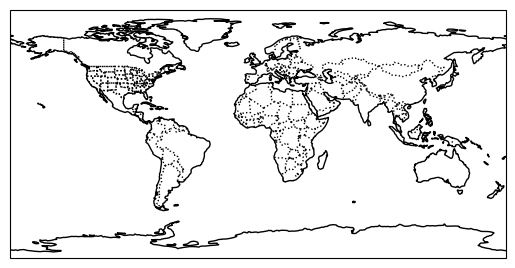

In [11]:
ax = plt.axes(projection=gfs_proj)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')
plt.contourf(lons, lats, subset.data, cmap='turbo')

In [ ]:
subset

In [ ]:
msgs[0]

In [ ]:
subset